In [1]:
import numpy as np
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

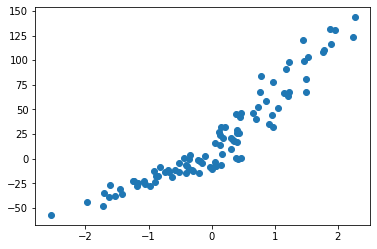

In [2]:
np.random.seed(0) # Pour maitriser l’aléatoire
x, y = make_regression(n_samples=100, n_features=1, noise=10) # permet de générer un nuage de points
y = y + abs(y/2) # abs() = valeur absolue
plt.scatter(x[:,0], y)

In [3]:
# Vérification des dimensions de nos matrices
print(x.shape)
y = y.reshape(y.shape[0], 1)
print(y.shape)

(100, 1)
(100, 1)


In [4]:
# Colonne de "biais" (colonne de "1")
# matrice X
X = np.hstack((x, np.ones(x.shape))) # permet de coller ensemble deux vecteurs numpy l'un à côté de l'autre
X = np.hstack((x**2, X)) # ajoute le vecteur x^2 a la gauche de la matrice X
print(X.shape)
print(X[:10])

(100, 3)
[[ 0.12927848 -0.35955316  1.        ]
 [ 0.95382381  0.97663904  1.        ]
 [ 0.1618788   0.40234164  1.        ]
 [ 0.66120688 -0.81314628  1.        ]
 [ 0.78816353 -0.88778575  1.        ]
 [ 0.19701457  0.44386323  1.        ]
 [ 0.95507205 -0.97727788  1.        ]
 [ 0.18346819  0.42833187  1.        ]
 [ 0.04337847  0.20827498  1.        ]
 [ 0.09706498 -0.31155253  1.        ]]


In [5]:
# On doit quand même initialiser theta avec des paramètres aléatoires 
theta = np.random.randn(3, 1) # dimensions du vecteur theta
theta.shape
theta

array([[-0.63743703],
       [-0.39727181],
       [-0.13288058]])

Modèle

In [6]:
# F = X.theta
def model(X, theta): 
    return X.dot(theta)

In [7]:
model(X[:10], theta)

array([[-0.07244713],
       [-1.12887435],
       [-0.39590711],
       [-0.23131822],
       [-0.28259294],
       [-0.43479931],
       [-0.35343391],
       [-0.41999418],
       [-0.2432734 ],
       [-0.07098235]])

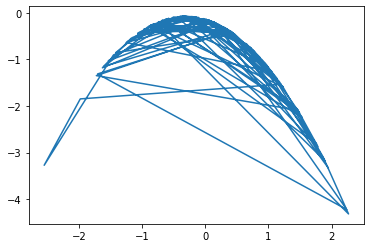

In [8]:
plt.plot(x, model(X, theta))

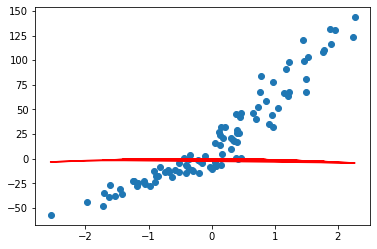

In [9]:
plt.scatter(x[:,0], y)
plt.plot(x[:,0], model(X, theta), c='r')

Fonction coût (erreur quadratique moyenne)

In [10]:
def cost_function(X, y, theta):
    m = len(y)
    return 1/(2*m) * np.sum((model(X, theta) - y)**2)

In [11]:
cost_function(X, y, theta)

1328.6654828872622

Gradient et Descente de Gradient

In [12]:
def grad(X, y, theta):
    m = len(y)
    return 1/m * X.T.dot(model(X, theta) - y)

In [13]:
def gradient_descent(X, y, theta, learning_rate, n_iterations):

    for i in range(0, n_iterations):
        theta = theta - learning_rate * grad(X, y, theta)
        
    return theta

In [14]:
def gradient_descent(X, y, theta, learning_rate, n_iterations):
    cost_history = np.zeros(n_iterations) # tableau de zéros
    theta_history = np.zeros((n_iterations, 3)) # notre theta (polynomial) contient ici trois éléments
    for i in range(0, n_iterations):
        theta = theta - learning_rate * grad(X, y, theta)
        cost_history[i] = cost_function(X, y, theta) # on enregistre le coût de notre modèle pour chaque itération
        theta_history[i,:] = theta.T
    return theta, cost_history, theta_history

Machine Learning

In [15]:
theta_final = gradient_descent(X, y, theta, learning_rate=0.01, n_iterations=1000)

In [16]:
n_iterations = 10
learning_rate = 0.3

theta_final, cost_history, theta_history = gradient_descent(X, y, theta, learning_rate, n_iterations)
print(theta_history.shape)

(10, 3)


In [17]:
theta_final

array([[ 9.09781786],
       [41.04007578],
       [ 7.35863508]])

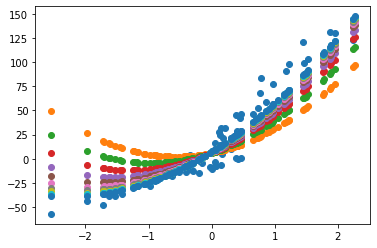

In [18]:
predictions = model(X, theta_final)
plt.scatter(x, y)
for i in range(n_iterations):
    # plt.plot(x, model(X, theta_history[i,:]))
    plt.scatter(x, model(X, theta_history[i]), lw=1)

Courbe d'apprentissage

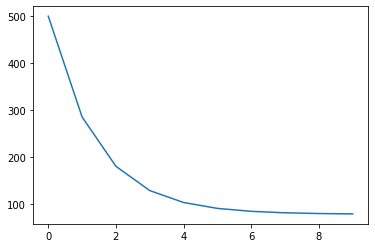

In [19]:
plt.plot(range(n_iterations), cost_history) # range(1000) = 1000 itérations de notre descente de gradient

Evaluation finale

In [20]:
def coef_determination(y, pred):
    u = ((y - pred)**2).sum()
    v = ((y - y.mean())**2).sum()
    return 1 - u/v

In [21]:
coef_determination(y, predictions)

0.9278514684927995

IndexError: index 1 is out of bounds for axis 1 with size 1

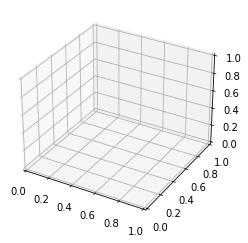

In [22]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x[:,0], x[:,1], y)
ax.scatter(x[:,0], x[:,1], predictions)